In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint

In [42]:
#The parameter values were based on "Self - Criticality of a Simple Integrate-and-fire Neural Model"

v_ext = 0.025
v_max = 1

u = 0.2
J = 1 #It is assummed to be constant for the simplest case. Let's assume a fully connected network of 4 nodes.

time = np.linspace(0,9,100) #10 seconds

t_dr = np.zeros(time.shape) #driven time on 5th second
t_dr[math.ceil(len(t_dr)/2)] = math.ceil(len(t_dr)/2)

t_sp = np.zeros(time.shape) #spiking time on 2nd, 4th, 6th, 8th seconds
t_sp[math.ceil(len(t_dr)/5)] = math.ceil(len(t_dr)/5)
t_sp[2 * math.ceil(len(t_dr)/5)] = 2 * math.ceil(len(t_dr)/5)
t_sp[3 * math.ceil(len(t_dr)/5)] = 3 * math.ceil(len(t_dr)/5)
t_sp[4 * math.ceil(len(t_dr)/5)] = 4 * math.ceil(len(t_dr)/5)

In [47]:
#Implement the delta function that exists in membrane potential (V_i) equation (1)
def delta_func(x):
    if x == 0:
        ans = 1
        print("Input's zero")
    else:
        ans = 0
        
    return ans

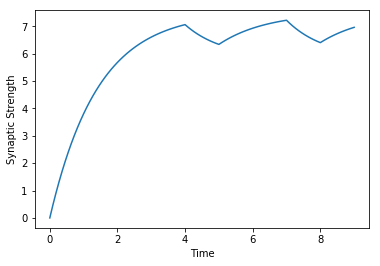

In [76]:
#Implementation of the synaptic strength equation (2) between two neurons
def syn_str(j,t):
    
    relax_time = 1.414
    contr_par = 1.50
    
    if (t >= 4.0 and t <= 5.0) or (t >= 7.0 and t <= 8.0):
        djdt = 1 / relax_time * (contr_par / u - j) - u * j
    else:
        djdt = 1 / relax_time * (contr_par / u - j)
    
    return djdt

#Set initial condition arbitrarily
j0 = 0

j = odeint(syn_str,j0,time)

plt.plot(time,j)
plt.ylabel('Synaptic Strength')
plt.xlabel('Time')
plt.show()

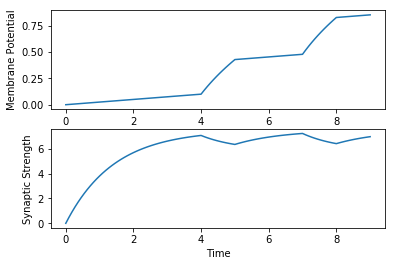

In [89]:
relax_time = 1.414
contr_par = 1.50

#Implementation of the membrane potential equation (1) of a neuron
def IandF(vj,t):
    
    v , j = vj
 
    if t >= 1.0 and t <= 2.0:
        dvdt = v_ext
        djdt = 1 / relax_time * (contr_par / u - j)
    elif (t >= 4.0 and t <= 5.0) or (t >= 7.0 and t <= 8.0):
        dvdt = sum(u * j / 1 for k in range(1,2)) - v_max 
        djdt = 1 / relax_time * (contr_par / u - j) - u * j
    else:
        dvdt = v_ext
        djdt = 1 / relax_time * (contr_par / u - j)
        
    return [dvdt, djdt]

#Set initial conditions arbitrarily
v0j0 = [0, 0]

i_f = odeint(IandF,v0j0,time)

plt.subplot(211)
plt.plot(time,i_f[:,0])
plt.ylabel('Membrane Potential')
plt.xlabel('Time')

plt.subplot(212)
plt.plot(time,i_f[:,1])
plt.ylabel('Synaptic Strength')
plt.xlabel('Time')

plt.show()